In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward,linkage, dendrogram, fcluster
import mysql.connector

In [4]:
USER=os.getenv('DB_USER')
PWD=os.getenv('DB_USER_PWD')

In [5]:
#df = pd.read_csv("data/ClusterPercent.csv", sep="," , index_col=0)
try:
    connection = mysql.connector.connect(host='localhost',
                             database='SocialMining',
                             user=USER,
                             password=PWD)
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL database... MySQL Server version on ",db_Info)
        cursor = connection.cursor()
        query='SELECT * FROM ClusterPercent'
        print("Reading data....")
        df = pd.read_sql(
            sql = query,
            con = connection,
            index_col=['ID'],)
except Error as e :
    print ("Error while connecting to MySQL", e)
finally:
    #closing database connection.
    if(connection.is_connected()):
        connection.close()
        print("connection is closed") 
df = df.drop(["sex","area","Total log time","Exam Performance"],axis=1)
df_values = df.values
weight = [2,2,2,2,2,1.5,1.5,1.5,1.5,1,1,1]
df.head(10)

Connected to MySQL database... MySQL Server version on  5.7.26-0ubuntu0.18.04.1
Reading data....
connection is closed


,Didactics,Study area,Conference rooms,Teachers,Museum,Medical use,Dormitory,Recreational activities,Transit,Central Administration,Department Offices,Technical rooms
ID,,,,,,,,,,,,
00:00:48:dd:35:b7,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0
00:00:6a:4a:28:6a,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
00:00:b6:ff:50:b6,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0
00:03:7f:c2:00:43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0
00:03:ab:db:1d:85,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
00:03:ac:19:2e:39,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
00:03:ac:19:2f:c6,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
00:03:ac:1c:9e:5d,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
00:03:ac:21:77:e6,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0


In [16]:
# calcola la matrice delle distanze tra ogni coppia di vettori del dataset
# ritorna un array 1-D in cui ogni valore è una distanza 
# (primo valore la distanza tra v1 e v2, secondo valore distanza tra v1 e v3, ecc.)

def weightedDistanceMatrix(X):
    distance_matrix = []
    for i in tqdm(range(0,len(X))):
        for j in range(i+1,len(X)):
            distance_matrix.append(np.abs(np.dot((X[i],X[j]),weight)))
    return distance_matrix

In [17]:
# esempio sulle prime 250 righe del dataset

df_values_cutted = df_values[0:250]


In [18]:
distance_cutted = weightedDistanceMatrix(df_values_cutted)

100%|██████████| 250/250 [00:00<00:00, 1183.69it/s]


In [19]:
link = linkage(distance_cutted, method='average')

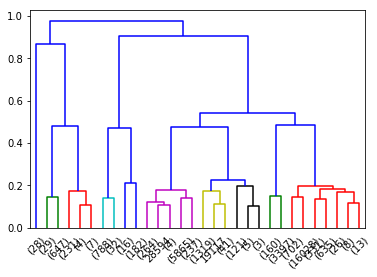

In [20]:
res = dendrogram(link,color_threshold=0.2, truncate_mode='lastp')

In [333]:
Z = ward(pdist(df_values_cutted))

In [334]:
Y=fcluster(Z, t=9, criterion='maxclust')

In [335]:
#aggiungo al dataset il valore del cluster 
df['cluster']=pd.Series(Y,index=df.index[0:len(Y)])
df


,Didactics,Study area,Conference rooms,Teachers,Museum,Medical use,Dormitory,Recreational activities,Transit,Central Administration,Department Offices,Technical rooms,cluster
ID,,,,,,,,,,,,,
00:00:36:75:f5:36,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,3.0
00:00:48:dd:35:b7,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,4.0
00:00:6a:4a:28:6a,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0
00:00:b6:ff:50:b6,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,4.0
00:03:7f:c2:00:43,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,9.0
00:03:ab:db:1d:85,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5.0
00:03:ac:19:2e:39,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0
00:03:ac:19:2f:c6,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6.0
00:03:ac:1c:9e:5d,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0


In [353]:
df.to_csv("data/ClusterPercent_risult.csv",mode = 'w')
df=None

ModuleNotFoundError: No module named 'MySQLdb'